# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Profissao- Cientista de Dados_M10_support material.csv')

In [85]:
def plot_distvar(df, variable):
    f, axs = plt.subplots(1, figsize= (10,4))
    
    sns.countplot(ax=axs, data= df, x='data_ref', hue= variable)  
        
    plt.title(variable)
    plt.ylabel('Count')
    plt.xticks(rotation=30)
    plt.legend(bbox_to_anchor=(1.05,1))

ValueError: Could not interpret input 'Casado'

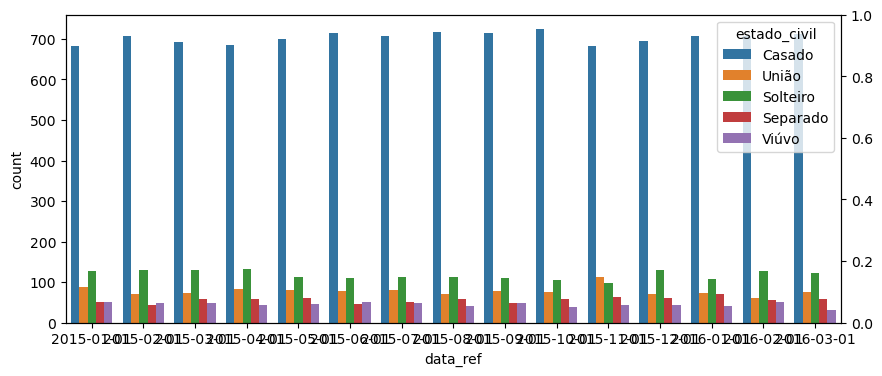

In [84]:
plot_distvar(df,'estado_civil')

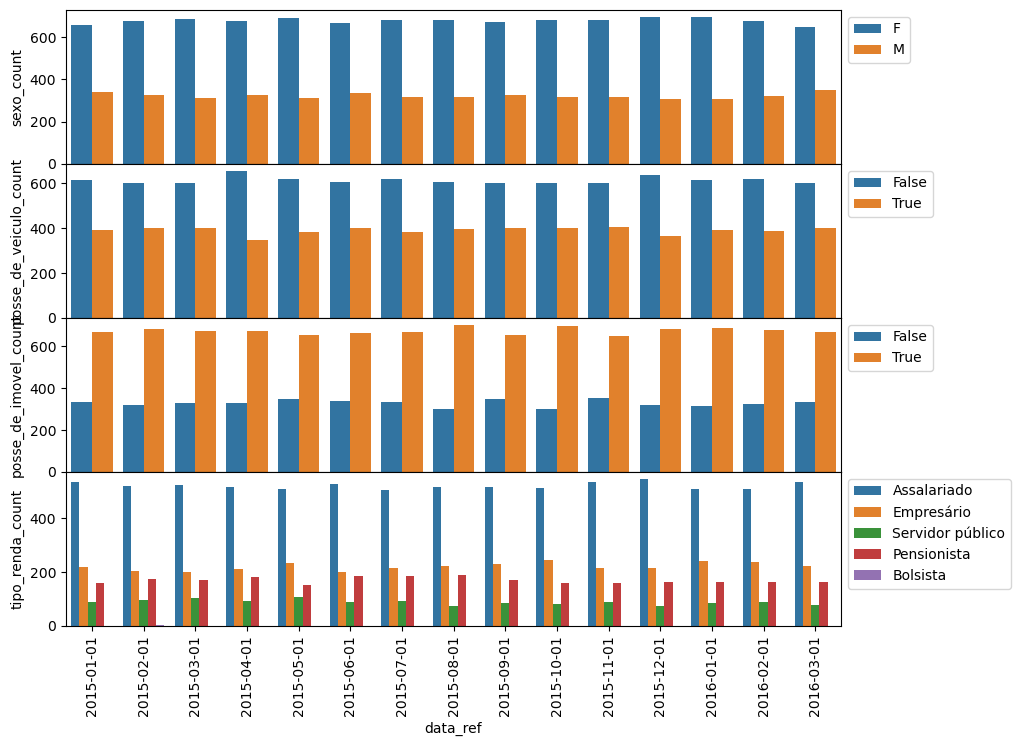

In [245]:
f, axs = plt.subplots(4, figsize= (10,8), sharex= True)

c1 = sns.countplot(ax=axs[0], data= df, x='data_ref', hue='sexo')
c2 = sns.countplot(ax=axs[1], data= df, x='data_ref', hue='posse_de_veiculo')
c3 = sns.countplot(ax=axs[2], data= df, x='data_ref', hue='posse_de_imovel')
c4 = sns.countplot(ax=axs[3], data= df, x='data_ref', hue='tipo_renda')

label = c4.set_xticklabels(df.data_ref.unique(), rotation=90)


c1.yaxis.set_label_text('sexo_count')
c2.yaxis.set_label_text('posse_de_veiculo_count')
c3.yaxis.set_label_text('posse_de_imovel_count')
c4.yaxis.set_label_text('tipo_renda_count')

c1.legend(bbox_to_anchor=(1.0, 1),loc=2)
c2.legend(bbox_to_anchor=(1.0, 1),loc=2)
c3.legend(bbox_to_anchor=(1.0, 1),loc=2)
c4.legend(bbox_to_anchor=(1.0, 1),loc=2)

f.subplots_adjust(hspace=0)

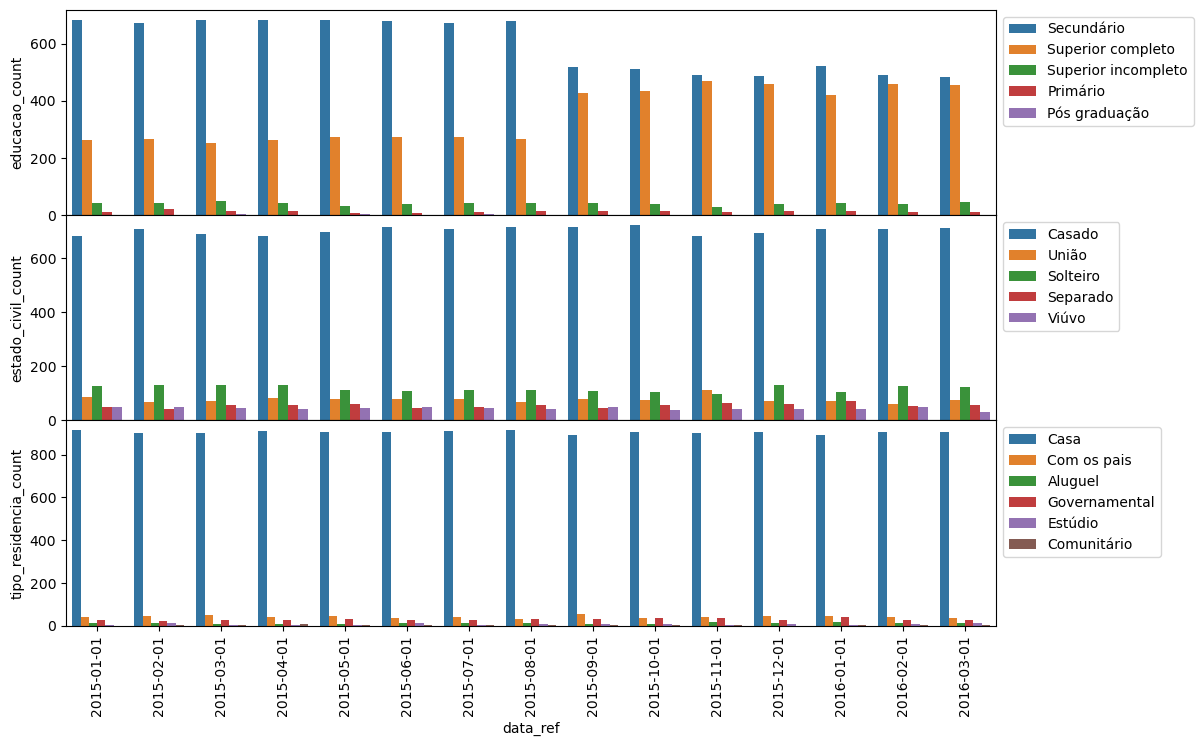

In [243]:
f, axs = plt.subplots(3, figsize= (12,8), sharex= True)

c5 = sns.countplot(ax=axs[0], data= df, x='data_ref', hue='educacao')
c6 = sns.countplot(ax=axs[1], data= df, x='data_ref', hue='estado_civil')
c7 = sns.countplot(ax=axs[2], data= df, x='data_ref', hue='tipo_residencia')

label = c7.set_xticklabels(df.data_ref.unique(), rotation=90)

c5.yaxis.set_label_text('educacao_count')
c6.yaxis.set_label_text('estado_civil_count')
c7.yaxis.set_label_text('tipo_residencia_count')

c5.legend(bbox_to_anchor=(1.0, 1),loc=2)
c6.legend(bbox_to_anchor=(1.0, 1),loc=2)
c7.legend(bbox_to_anchor=(1.0, 1),loc=2)

f.subplots_adjust(hspace=0)

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

In [49]:
def plot_categorical_variable(df, variable):
    # cria dummies e agrupa pela data_ref
    dummies = pd.get_dummies(df[variable])
    dummies = dummies.join(df['data_ref'], how='left')
    dummies = dummies.groupby('data_ref').mean()
            
    
    # plota gráfico de linhas
    dummies.plot(kind='line', figsize=(8,4))
    plt.xticks(rotation=30)    
    plt.title(variable)
    plt.ylabel('Média')
    plt.legend(bbox_to_anchor=(1.05,1))
    plt.show()

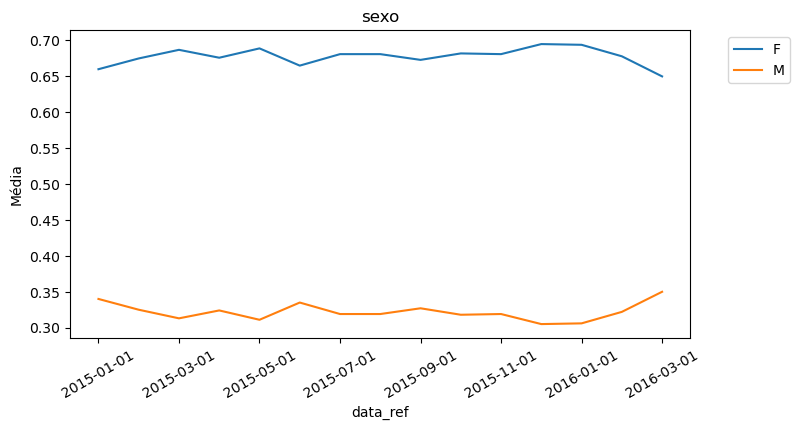

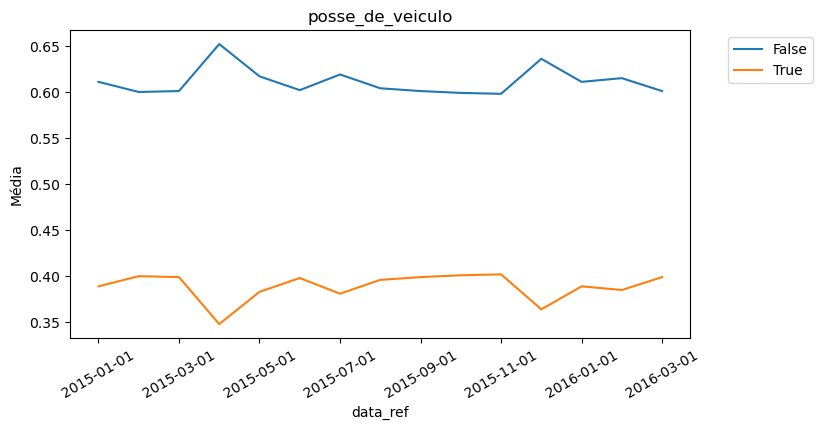

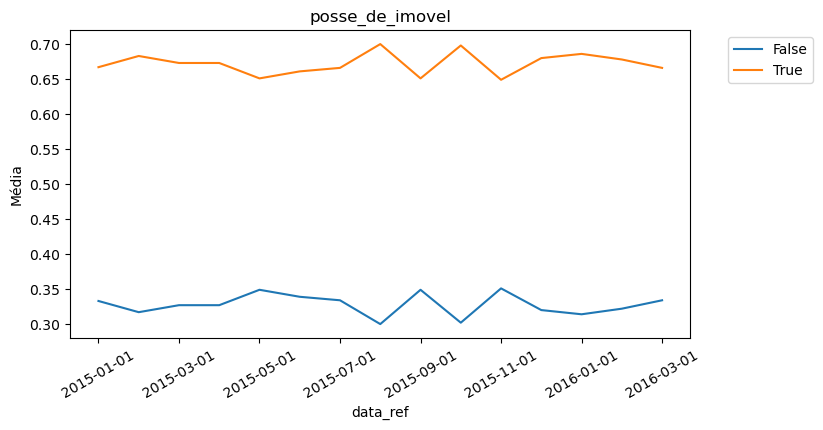

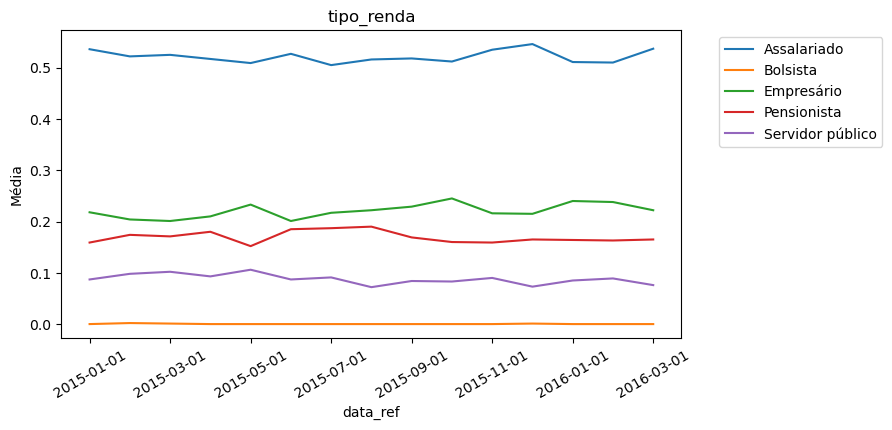

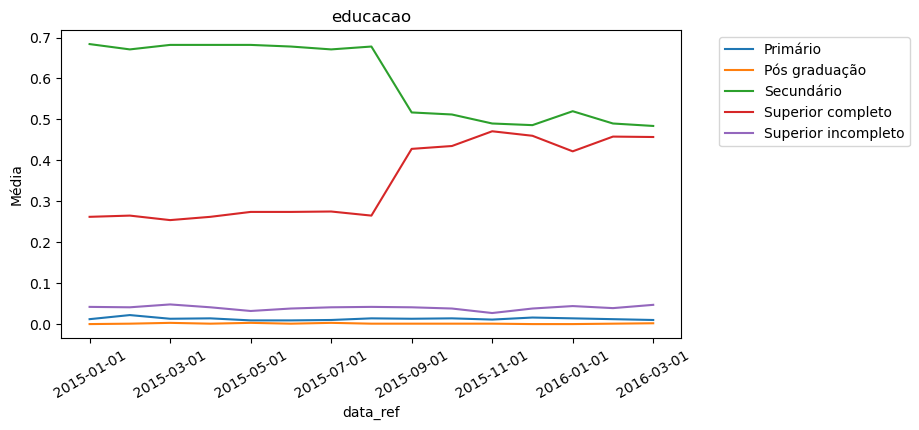

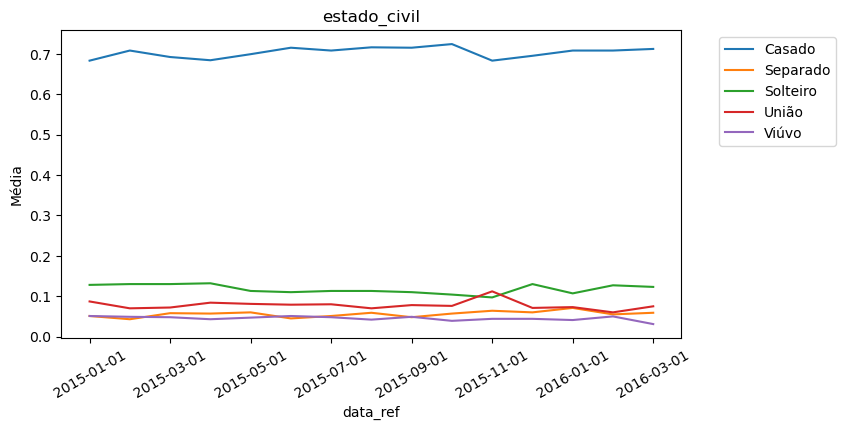

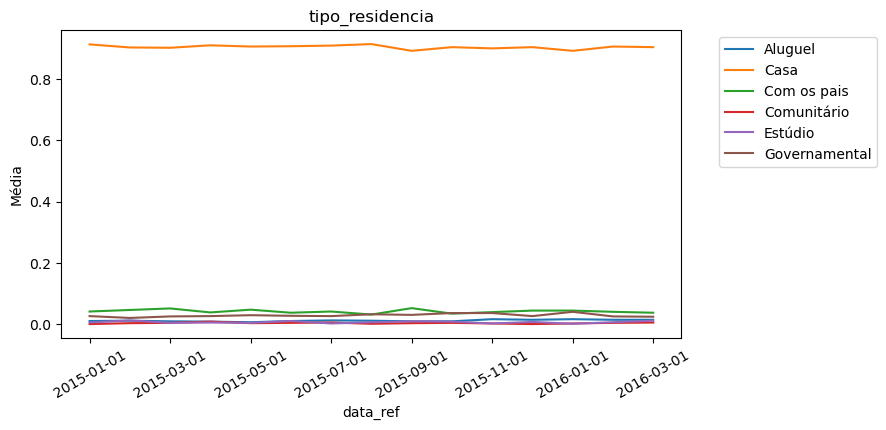

In [51]:
plot_categorical_variable(df, 'sexo')
plot_categorical_variable(df, 'posse_de_veiculo')
plot_categorical_variable(df, 'posse_de_imovel')
plot_categorical_variable(df, 'tipo_renda')
plot_categorical_variable(df, 'educacao')
plot_categorical_variable(df, 'estado_civil')
plot_categorical_variable(df, 'tipo_residencia')

In [ ]:
As variáveis parecem manter uma média estável. Destaque para a variável educacao que apresenta
um comportamento distinto durante a segunda metade do ano para os valores superior completo e secundário.